In [1]:
#Import the usual library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

## Independent T-Test

Let's create the dataset

In [2]:
hat = pd.concat([pd.Series(data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'],name = 'Wearing Hat'),
                pd.Series(data = [70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name ='Score')],axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Frequency')

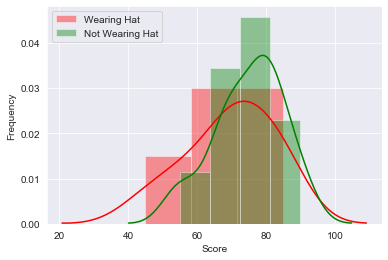

In [3]:
sns.set_style('darkgrid')
sns.distplot(hat[hat['Wearing Hat'] == 'Yes']['Score'], color = 'red', label = 'Wearing Hat')
sns.distplot(hat[hat['Wearing Hat'] == 'No']['Score'], color = 'green', label ='Not Wearing Hat')
plt.legend()
plt.ylabel('Frequency')

The distribution is seems to follow the Normal Distribution, let's try use the Independent T-Test from the Scipy

In [4]:
from scipy.stats import ttest_ind
result = list(ttest_ind(hat[hat['Wearing Hat'] == 'No']['Score'], hat[hat['Wearing Hat'] == 'Yes']['Score']))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: 1.049338951235674
P-Value: 0.3079077456715031


The P-value is higher than our significant level 0.05, it means we have evidence to accept the Null Hypothesis.

## One-Way ANOVA
Let's create the dataset

In [5]:
transport = []
method = ['Walking ', 'Public ', 'Private ']
for i in method:
    transport.extend((i*10).split())

In [6]:
transportdf = pd.concat([pd.Series(transport, name = 'Transportation'), 
                     pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name = 'Study Hour')], axis =1)
transportdf.sample(5)

,Transportation,Study Hour
11,Public,7
7,Walking,4
24,Private,6
28,Private,7
2,Walking,5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Frequency')

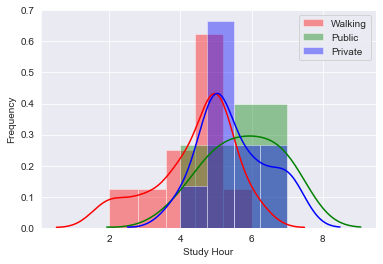

In [7]:
sns.distplot(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], color = 'red', label = 'Walking')
sns.distplot(transportdf[transportdf['Transportation'] == 'Public']['Study Hour'], color = 'green', label = 'Public')
sns.distplot(transportdf[transportdf['Transportation'] == 'Private']['Study Hour'], color = 'blue', label = 'Private')
plt.legend()
plt.ylabel('Frequency')

In [8]:
for i in transportdf['Transportation'].unique():
    print('Mean of Study Hour Group {}: {}'.format(i,transportdf[transportdf['Transportation'] == i]['Study Hour'].mean()))

Mean of Study Hour Group Walking: 4.4
Mean of Study Hour Group Public: 5.8
Mean of Study Hour Group Private: 5.5


In [9]:
print('Total Study Hour Mean: ', transportdf['Study Hour'].mean())

Total Study Hour Mean:  5.233333333333333


In [10]:
from math import pow
total = 0
for i, j in zip(transportdf['Transportation'], transportdf['Study Hour']):
    total += (pow(((transportdf[transportdf['Transportation'] == i]['Study Hour'].mean()) - j), 2))

In [11]:
print('MSwithin: ',total)

MSwithin:  30.500000000000004


In [12]:
#Importing One-Way ANOVA from Scipy. One-Way ANOVA is called F one-way as well because the test follow the F- Distribution
from scipy.stats import f_oneway
f_oneway(transportdf[transportdf['Transportation'] == 'Walking']['Study Hour'], 
        transportdf[transportdf['Transportation'] == 'Public']['Study Hour'],
        transportdf[transportdf['Transportation'] == 'Private']['Study Hour'])

F_onewayResult(statistic=4.809836065573772, pvalue=0.0163405142361861)

In [36]:
import seaborn as sns
def dice_roll(n, time):
    ploting = []
    for i in range(time):
        dadu = []
        for j in range(n):
            dadu.append(np.random.randint(1,7))
        ploting.append(sum(dadu)) 
#     plt.figure(figsize = (8,8))    
#     sns.distplot(ploting)  
#     plt.xticks(range(n, (n*6)+1))
    return ploting
    

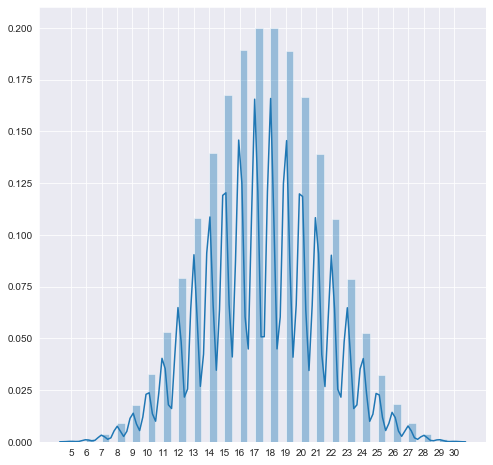

In [34]:
dice_roll(5, 1000000)

In [37]:
data = dice_roll(5, 1000000)

In [60]:
np.histogram(data, bins = 10)

(array([  2717,  13484,  82141, 123240, 279312, 194781, 206887,  65304,
         29395,   2739], dtype=int64),
 array([ 5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. ]))

In [42]:
hist

array([  2717,  13484,  82141, 123240, 279312, 194781, 206887,  65304,
        29395,   2739], dtype=int64)

In [45]:
edges[1] - edges[0]

2.5

In [48]:
hist, edges = np.histogram(data, normed = True)
np.cumsum(hist)*2.5

C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


array([0.002717, 0.016201, 0.098342, 0.221582, 0.500894, 0.695675,
       0.902562, 0.967866, 0.997261, 1.      ])

C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


([<matplotlib.axis.YTick at 0x1bafb020400>,
 <a list of 6 Text yticklabel objects>)

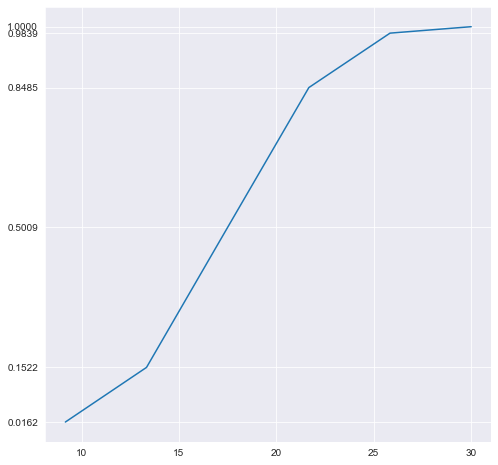

In [65]:
hist,hist_edges = np.histogram(data, bins = 6, normed = True)
dx = hist_edges[1] - hist_edges[0]
F1 = np.cumsum(hist)*dx

# X2 = np.sort(data)
# F2 = np.array(range(len(data)))/float(len(data))
plt.figure(figsize = (8,8))
plt.plot(hist_edges[1:], F1)
plt.yticks(F1)
# plt.plot(X2, F2)